In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 


In [10]:
df = pd.read_csv("gym_members_exercise_tracking.csv")

In [15]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [18]:
df.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

In [25]:
df.shape

(973, 15)

In [37]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

# Apply to the gender column 
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

#Apply Encoding to Workout Type Column 
df['Workout_Type_Encoded'] = le.fit_transform(df['Workout_Type'])

df[['Gender', 'Gender_Encoded', 'Workout_Type', 'Workout_Type_Encoded']].head()

,Gender,Gender_Encoded,Workout_Type,Workout_Type_Encoded
0,Male,1,Yoga,3
1,Female,0,HIIT,1
2,Female,0,Cardio,0
3,Male,1,Strength,2
4,Male,1,Strength,2


In [41]:
df_new = df.drop(columns = ['Gender','Workout_Type'])
df_new

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,3
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,2
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,1,2
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,1,2
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,0,0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,1,1


<AxesSubplot:>

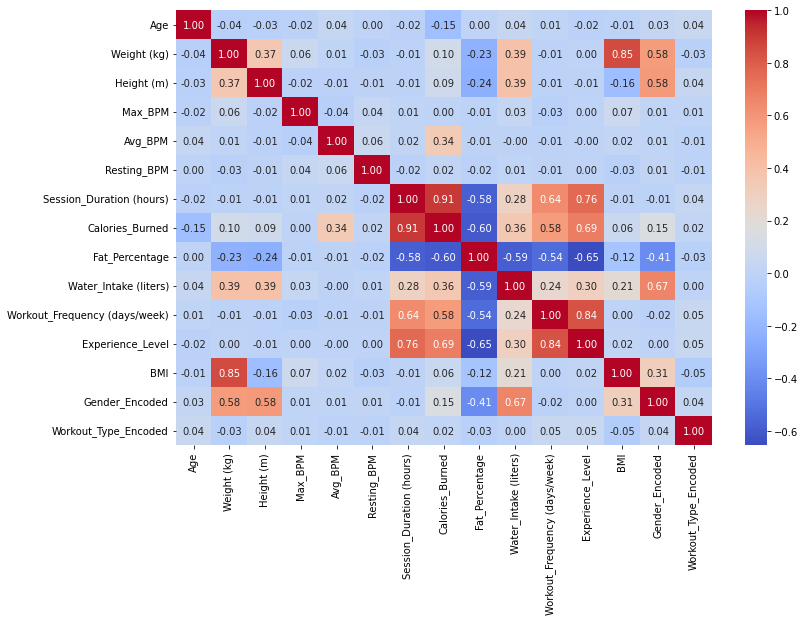

In [46]:
#Correlation Matrix
corr = df_new.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True , cmap = 'coolwarm', fmt = '.2f')

<AxesSubplot:xlabel='Workout_Type', ylabel='Calories_Burned'>

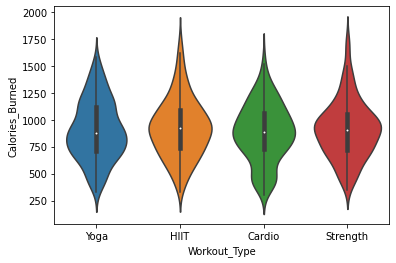

In [55]:
sns.violinplot(data = df, x = 'Workout_Type', y = 'Calories_Burned')

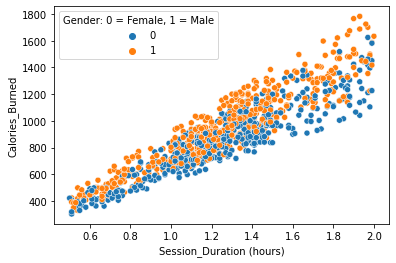

In [59]:
sns.scatterplot(data = df_new, x = 'Session_Duration (hours)', y = 'Calories_Burned', hue = 'Gender_Encoded')
plt.legend(title='Gender: 0 = Female, 1 = Male')
plt.title('Scatter Plot of Session Duration and Calories Burned')
plt.show()

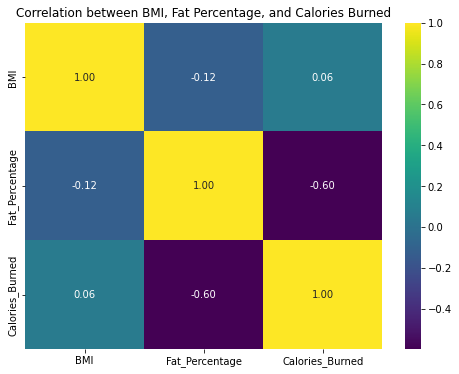

NameError: name 'data' is not defined

In [64]:
# Calculate the correlations between BMI, Fat Percentage, and Calories Burned
correlations = df_new[['BMI', 'Fat_Percentage', 'Calories_Burned']].corr()

# Visualize the relationships with pair plots and a heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation between BMI, Fat Percentage, and Calories Burned")
plt.show()

# Pair plot to visually analyze relationships
sns.pairplot(data, vars=['BMI', 'Fat_Percentage', 'Calories_Burned'], hue='Workout_Type', palette='viridis', markers=["o", "s", "D", "X"])
plt.suptitle("Relationships between BMI, Fat Percentage, and Calories Burned", y=1.02)
plt.show()

correlations



In [73]:
#Linear Regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


#Select variables and the target variable
x = df_new[['Gender_Encoded', 'Session_Duration (hours)', 'Workout_Type_Encoded', 'Water_Intake (liters)', 
          'Experience_Level', 'Avg_BPM']]
y = df_new['Calories_Burned']

# Standardize continuous features
scaler = StandardScaler()

# Standardize continuous features using .loc to avoid the warning
x.loc[:, ['Session_Duration (hours)', 'Water_Intake (liters)', 'Avg_BPM']] = scaler.fit_transform(
    x[['Session_Duration (hours)', 'Water_Intake (liters)', 'Avg_BPM']]
)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Initialize and train the model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Print model coefficients for interpretability
coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_
})
print(coef_df)

Mean Absolute Error (MAE): 52.594878717983306
Mean Squared Error (MSE): 3751.224453302
R-squared (R2): 0.9550347821354787
                    Feature  Coefficient
0            Gender_Encoded    93.478233
1  Session_Duration (hours)   246.329202
2      Workout_Type_Encoded    -3.957754
3     Water_Intake (liters)    -3.998578
4          Experience_Level     3.585617
5                   Avg_BPM    85.258185


<ipython-input-73-ac86b16ab74c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, ['Session_Duration (hours)', 'Water_Intake (liters)', 'Avg_BPM']] = scaler.fit_transform(


In [79]:
import statsmodels.api as sm

# Add a constant term for the intercept
x = sm.add_constant(x)

# Fit the model
model_sm = sm.OLS(y, x).fit()

# Print the summary to view the p-values and t-statistics for each coefficient
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3491.
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:22:40   Log-Likelihood:                -5318.1
No. Observations:                 973   AIC:                         1.065e+04
Df Residuals:                     966   BIC:                         1.068e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Hypothesis Testing on Model Coefficients

Based on the p-values for each coefficient, we can determine whether to reject the null hypothesis for each feature:

### Interpreting the p-values

1. **Gender_Encoded (p = 0.000)**:
   - The p-value is well below 0.05, so we **reject the null hypothesis**. This suggests that gender significantly impacts calories burned.

2. **Session_Duration (hours) (p = 0.000)**:
   - The p-value is very low, so we **reject the null hypothesis**. This indicates that session duration has a significant positive effect on calories burned.

3. **Workout_Type_Encoded (p = 0.014)**:
   - The p-value is below 0.05, so we **reject the null hypothesis**. This suggests that workout type also significantly impacts calories burned, though its effect is relatively small.

4. **Water_Intake (liters) (p = 0.238)**:
   - The p-value is greater than 0.05, so we **do not reject the null hypothesis**. This implies that water intake is not a statistically significant predictor of calories burned in this model.

5. **Experience_Level (p = 0.473)**:
   - The p-value is above 0.05, so we **do not reject the null hypothesis**. This suggests that experience level does not have a significant effect on calories burned.

6. **Avg_BPM (p = 0.000)**:
   - The p-value is very low, so we **reject the null hypothesis**. This indicates that average BPM significantly affects calories burned.

### Conclusion
- **Significant Predictors**: Gender, Session Duration, Workout Type, and Avg BPM.
- **Non-significant Predictors**: Water Intake and Experience Level.

These results imply that **Gender**, **Session Duration**, **Workout Type**, and **Avg BPM** are statistically significant predictors of calories burned. Meanwhile, **Water Intake** and **Experience Level** do not appear to contribute significantly in this model.


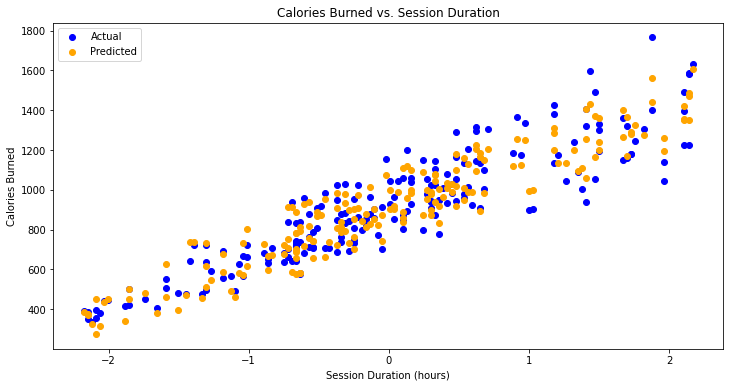

In [77]:
import matplotlib.pyplot as plt

# Generate predictions based on the test set
y_pred = model.predict(x_test)

# Create a DataFrame for plotting
plot_data = x_test.copy()
plot_data['Calories_Burned'] = y_test.values
plot_data['Predicted_Calories_Burned'] = y_pred

# Plot Calories Burned vs. Session Duration with predictions
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Session_Duration (hours)'], plot_data['Calories_Burned'], color="blue", label="Actual")
plt.scatter(plot_data['Session_Duration (hours)'], plot_data['Predicted_Calories_Burned'], color="orange", label="Predicted")
plt.title("Calories Burned vs. Session Duration")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.legend()
plt.show()




## Model Performance Metrics

1. **Mean Absolute Error (MAE)**: The model’s average error in predicting calories burned is approximately **52.6 calories**. This means, on average, predictions are off by this amount.
2. **Mean Squared Error (MSE)**: The MSE value of **3751.2** is a measure of the variance of the prediction errors. It’s more sensitive to larger errors due to squaring.
3. **R-squared (R²) Score**: With an R² of **0.955**, the model explains about 95.5% of the variability in calories burned. This indicates a strong fit and suggests that the selected features capture the main patterns in calorie expenditure.

## Feature Coefficients

Each coefficient shows the relationship between a feature and the target (calories burned) when other variables are held constant:

1. **Gender\_Encoded (93.48)**: Being in the encoded gender group adds an average of about 93 calories burned, indicating a significant influence of gender on energy expenditure.
2. **Session Duration (246.33)**: For every additional hour in session duration, calories burned increase by about **246 calories**. This is the largest coefficient, highlighting session length as a primary driver of calorie expenditure.
3. **Workout Type (-3.96)**: The coefficient suggests a slight negative impact from the encoded workout type, though it’s quite small and may not be statistically significant.
4. **Water Intake (-4.00)**: For each additional liter of water intake, there’s a slight decrease in calories burned. This could reflect a minor inverse relationship, though it may be due to noise in the data.
5. **Experience Level (3.59)**: Each increase in experience level is associated with a small increase in calories burned.
6. **Avg BPM (85.26)**: For every unit increase in average BPM, calories burned increase by about **85 calories**, showing that intensity plays an important role in calorie expenditure.

## Interpretation

The model shows that **session duration** and **average BPM** are the most impactful features for predicting calories burned, with **gender** also having a significant effect. The high R² score suggests the model performs well, but be mindful of potential overfitting if the dataset is small or highly specific to certain conditions.


